In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import csv
import os
import re

In [6]:
%matplotlib inline

In [7]:
log_dicts = sorted(glob.glob('./AM_erm*/'), key= lambda x:int(re.sub('s','',x).split('_')[-1].split('/')[0]))

In [8]:
tip = {}
bs_lr = {8:[5e-6, 1e-5,5e-5], 16:[1e-5, 5e-5, 1e-4], 32:[1e-5,1e-4,5e-4]}
bs_ng = {8:[2,4], 16:[2, 4], 32:[4,8]}

i = 0
toto = []
toto2 = []
toto3 = []

for prob in ['ama']:
    for bs in [8,16, 32]:
        for lr in bs_lr[bs]:
            for dire in ["False"]:
                for ng in bs_ng[bs]:
                    tip[i] = (bs,lr,ng)
                    toto.append((bs,lr))
                    toto2.append((bs,ng))
                    toto3.append((lr, ng))
                    i+=1
                    
toto = list(set(toto))
toto2 = list(set(toto2))
toto3 = list(set(toto3))


In [12]:
len(toto), len(toto2), len(toto3)

(9, 6, 12)

In [13]:
def parse_config(log_di, my_keys):
    config = open(log_di+'log.txt').read().split('\n')
    dat_conf = {}
    for ll in config:
        if 'Resume' in ll:
            break
        if ll.split(':')[0] in my_keys:
            dat_conf[ll.split(':')[0]] = ll.split(':')[1]
    return dat_conf

In [14]:
def read_to_dict(file_name):
    res_dict = {}
    keym = {}
    with open(file_name, newline='') as csvfile:
        csv_reader = csv.reader(csvfile, delimiter=',')
        for i, row in enumerate(csv_reader):
            if i == 0:
                for j, rr in enumerate(row):
                    res_dict[rr] = []
                    keym[j] = rr
            else:
                for j, rr in enumerate(row):
                    res_dict[keym[j]].append(float(rr))
    return res_dict

In [15]:
train_res_dict = {}
val_res_dict = {}
test_res_dict = {}
in_test_res_dict = {}

for logd in log_dicts:
    keym = {}
    print(logd)
    train_res_dict[logd] = read_to_dict('{}train_algo.csv'.format(logd))
    val_res_dict[logd] = read_to_dict('{}val_eval.csv'.format(logd))
    test_res_dict[logd] = read_to_dict('{}test_eval.csv'.format(logd))
    in_test_res_dict[logd] = read_to_dict('{}id_test_eval.csv'.format(logd))

./AM_erm_0/
./AM_erm_1/
./AM_erm_2/
./AM_erm_3/
./AM_erm_4/
./AM_erm_5/
./AM_erm_6/
./AM_erm_7/
./AM_erm_8/
./AM_erm_9/
./AM_erm_10/
./AM_erm_11/
./AM_erm_12/
./AM_erm_13/
./AM_erm_14/
./AM_erm_15/
./AM_erm_16/
./AM_erm_17/


In [ ]:
acc_avg /  10th_percentile_acc

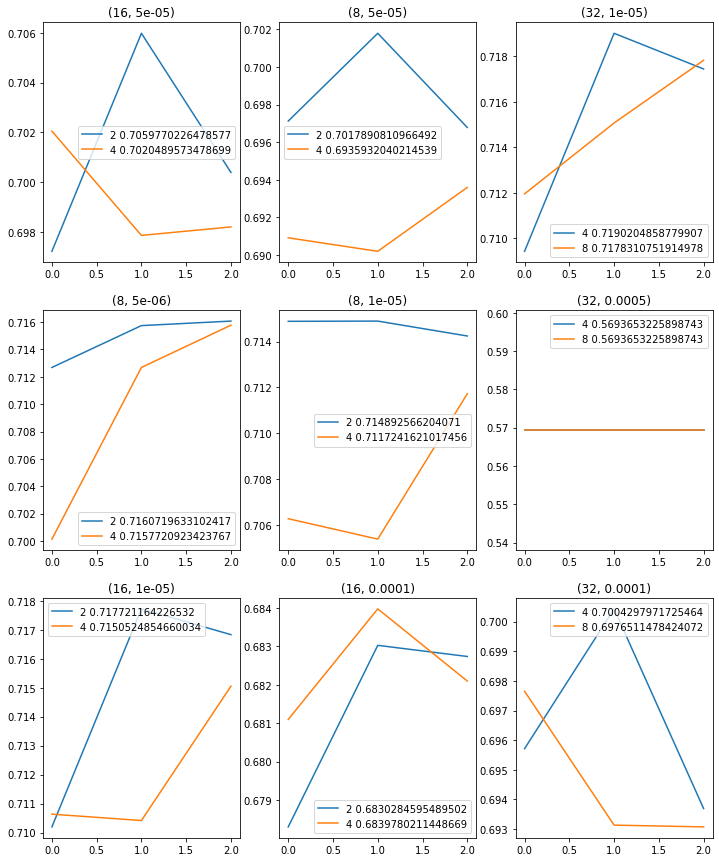

In [19]:
fig, axs = plt.subplots(3, 3, figsize=(12,15))
for i,logd in enumerate(test_res_dict):
    ti = toto.index((tip[i][0], tip[i][1]))
    loc1 = ti%3
    loc2 = int((ti - loc1)/3)
    newl = "{} {}".format(tip[i][2], np.max(test_res_dict[logd]['acc_avg']))
    axs[loc1,loc2].plot(test_res_dict[logd]['epoch'], np.array(test_res_dict[logd]['acc_avg']), label=newl)
    axs[loc1,loc2].set_title("{}".format((tip[i][0], tip[i][1])))
    axs[loc1,loc2].legend()

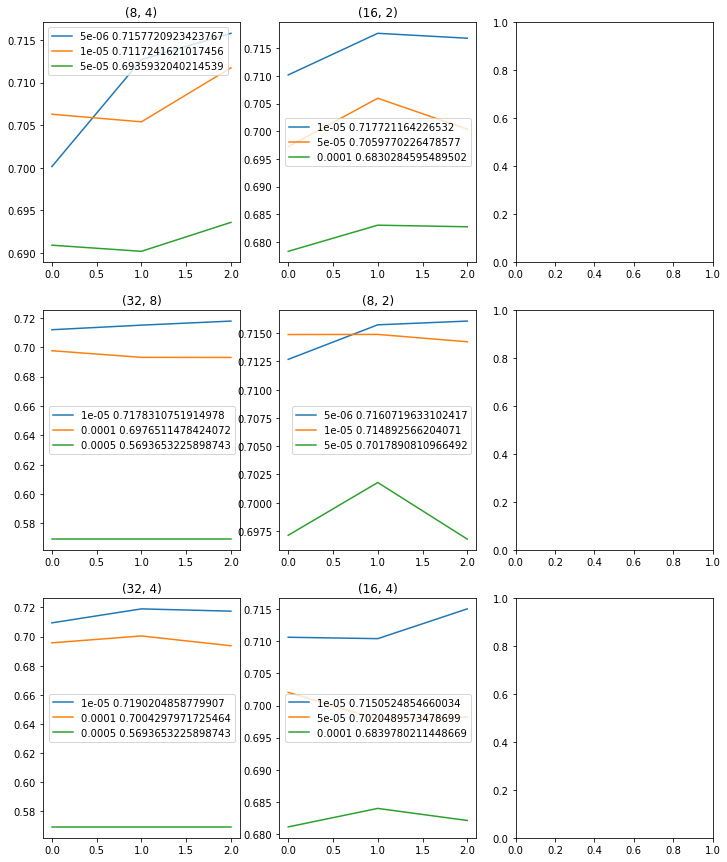

In [21]:
fig, axs = plt.subplots(3, 3, figsize=(12,15))
for i,logd in enumerate(test_res_dict):
    ti = toto2.index((tip[i][0], tip[i][2]))
    loc1 = ti%3
    loc2 = int((ti - loc1)/3)
    newl = "{} {}".format(tip[i][1],np.max(test_res_dict[logd]['acc_avg']))
    axs[loc1,loc2].plot(test_res_dict[logd]['epoch'], np.array(test_res_dict[logd]['acc_avg']),label=newl)
    axs[loc1,loc2].legend()
    axs[loc1,loc2].set_title("{}".format((tip[i][0], tip[i][2])))

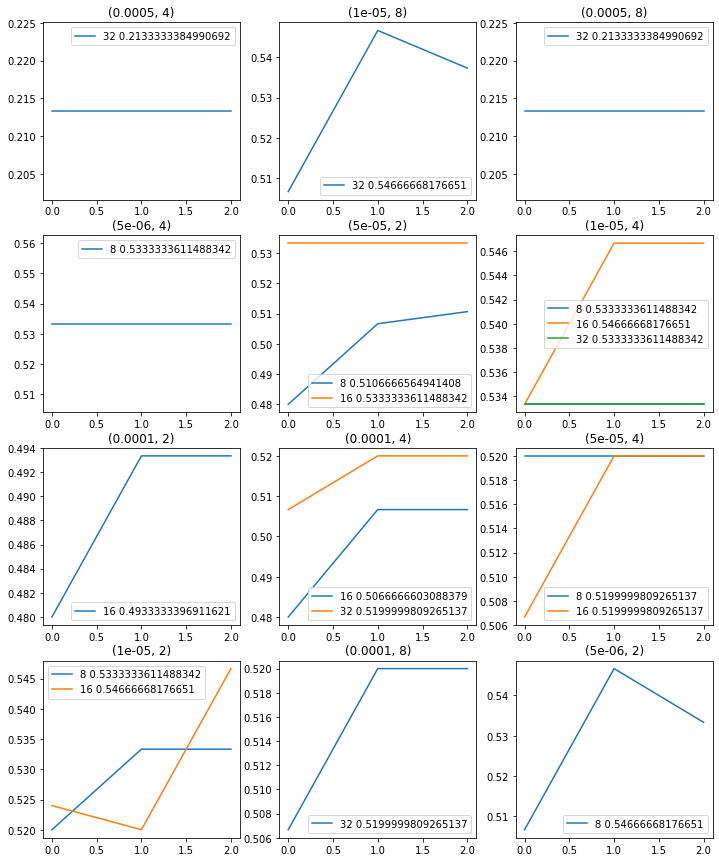

In [23]:
fig, axs = plt.subplots(4, 3, figsize=(12,15))
for i,logd in enumerate(test_res_dict):
    ti = toto3.index((tip[i][1], tip[i][2]))
    loc1 = ti%4
    loc2 = int((ti - loc1)/4)
    newl = "{} {}".format(tip[i][0],np.max(test_res_dict[logd]['10th_percentile_acc']))
    axs[loc1,loc2].plot(test_res_dict[logd]['epoch'], np.array(test_res_dict[logd]['10th_percentile_acc']),label=newl)
    axs[loc1,loc2].legend()
    axs[loc1,loc2].set_title("{}".format((tip[i][1], tip[i][2])))

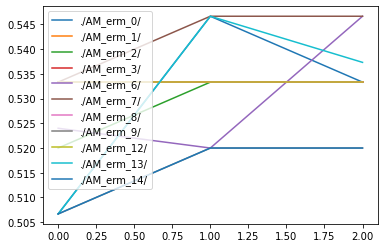

In [35]:
for i,logd in enumerate(test_res_dict):
    if '16' in logd:
        continue
    if '17' in logd:
        continue
    if '10' in logd:
        continue
    if '11' in logd:
        continue
    if '15' in logd:
        continue
    if 'AM_erm_5' in logd:
        continue
    if 'AM_erm_4' in logd:
        continue
    plt.plot(test_res_dict[logd]['epoch'], np.array(test_res_dict[logd]['10th_percentile_acc']),label=logd)
plt.legend()

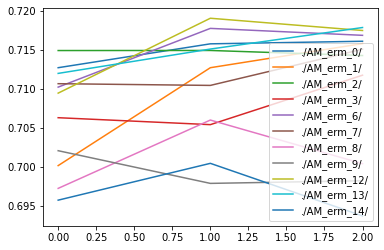

In [34]:
for i,logd in enumerate(test_res_dict):
    if '16' in logd:
        continue
    if '15' in logd:
        continue
    if '17' in logd:
        continue
    if '10' in logd:
        continue
    if '11' in logd:
        continue
    if 'AM_erm_5' in logd:
        continue
    if 'AM_erm_4' in logd:
        continue

    plt.plot(test_res_dict[logd]['epoch'], np.array(test_res_dict[logd]['acc_avg']),label=logd)
plt.legend()

{0: (32, 5e-05, 'False', 4),
 1: (32, 5e-05, 'True', 4),
 2: (32, 0.0001, 'False', 4),
 3: (32, 0.0001, 'True', 4),
 4: (64, 0.0001, 'False', 4),
 5: (64, 0.0001, 'False', 8),
 6: (64, 0.0001, 'True', 4),
 7: (64, 0.0001, 'True', 8),
 8: (64, 5e-05, 'False', 4),
 9: (64, 5e-05, 'False', 8),
 10: (64, 5e-05, 'True', 4),
 11: (64, 5e-05, 'True', 8),
 12: (64, 0.0005, 'False', 4),
 13: (64, 0.0005, 'False', 8),
 14: (64, 0.0005, 'True', 4),
 15: (64, 0.0005, 'True', 8),
 16: (64, 0.001, 'False', 4),
 17: (64, 0.001, 'False', 8),
 18: (64, 0.001, 'True', 4),
 19: (64, 0.001, 'True', 8)}